In [2]:
# Load libraries
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
#import jinja2



# Load Dataset
df = pd.read_csv("/Users/rachel/Desktop/binf5507git/BINF5507/Assignment4/Data/RADCURE_Clinical_v04_20241219 - RADCURE_TCIA_Clinical_r2_offset.csv")
#df.head()

# Clean Dataset

# Identify features where <50% of the data is missing - drop colums
missing_data = (df.isna().sum() / len(df)) * 100
#print(missing_data)
drop_cols = missing_data[missing_data >= 50].index
df_clean = df.drop(columns=drop_cols)

# Drop rows that are missing tumor stage data (0.8% of patients missing tumor stage info)
df_clean = df_clean.dropna(subset=["Stage"])
unique_values = df_clean["Stage"].unique()
# print(unique_values)

# Encode tumor stage groups - X means cannot be assessed and will not have a plot generated
df_clean["Stage Encoded"] = df_clean['Stage'].map({
    "0":0,
    "I":1,
    "IB":1,
    "II":2,
    "IIA":2,
    "IIB":2,
    "III":3,
    "IIIA":3,
    "IIIC":3,
    "IV":4,
    "IVA":4,
    "IVC":4,
    "IVB":4,
    "X":"X"
})
# Encode event 
df_clean["Status Encoded"] = df_clean["Status"].map({"Dead": 1, "Alive": 0})


# Subset to compare groups
km_subset = df_clean[["Status Encoded", "Stage Encoded", "Length FU"]]
# print(km_subset.isna().sum()) # double check for missing values
km_stage1 = km_subset[km_subset["Stage Encoded"] == 1]
km_stage2 = km_subset[km_subset["Stage Encoded"] == 2]
km_stage3 = km_subset[km_subset["Stage Encoded"] == 3]
km_stage4 = km_subset[km_subset["Stage Encoded"] == 4]



# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
km_stage1_fitted = kmf.fit(km_stage1['Length FU'], event_observed=km_stage1['Status Encoded'])
km_stage2_fitted = kmf.fit(km_stage2['Length FU'], event_observed=km_stage2['Status Encoded'])
km_stage3_fitted = kmf.fit(km_stage3['Length FU'], event_observed=km_stage3['Status Encoded'])
km_stage4_fitted = kmf.fit(km_stage4['Length FU'], event_observed=km_stage4['Status Encoded'])


# # Plot the Kaplan-Meier curves
stages_list =[km_stage1_fitted, km_stage2_fitted, km_stage3_fitted, km_stage4_fitted]
stage_number = [1, 2, 3, 4]

i = 0
for stage in stages_list:
    stage.plot_survival_function()
    plt.title(f'Kaplan-Meier Curve for Stage {stage_number[i]} Tumors')
    plt.xlabel('Time')
    plt.ylabel('Survival Probability')
    plt.show()
    i = i+1

# Log rank test to compare survival of different tumor stage groups 
Stage1vs2 = logrank_test(km_stage1['Length FU'], km_stage2['Length FU'],
                       event_observed_A=km_stage1['Status Encoded'], event_observed_B=km_stage2['Status Encoded'])
print(Stage1vs2)

Stage1vs3 = logrank_test(km_stage1['Length FU'], km_stage3['Length FU'],
                       event_observed_A=km_stage1['Status Encoded'], event_observed_B=km_stage3['Status Encoded'])
print(Stage1vs3)

Stage1vs4 = logrank_test(km_stage1['Length FU'], km_stage4['Length FU'],
                       event_observed_A=km_stage1['Status Encoded'], event_observed_B=km_stage4['Status Encoded'])
print(Stage1vs4)

Stage2vs3 = logrank_test(km_stage2['Length FU'], km_stage3['Length FU'],
                       event_observed_A=km_stage2['Status Encoded'], event_observed_B=km_stage3['Status Encoded'])
print(Stage2vs3)

Stage2vs4 = logrank_test(km_stage2['Length FU'], km_stage4['Length FU'],
                       event_observed_A=km_stage2['Status Encoded'], event_observed_B=km_stage4['Status Encoded'])
print(Stage2vs4)

Stage3vs4 = logrank_test(km_stage3['Length FU'], km_stage4['Length FU'],
                       event_observed_A=km_stage3['Status Encoded'], event_observed_B=km_stage4['Status Encoded'])
print(Stage3vs4)


ModuleNotFoundError: No module named 'jinja2'

patient_id            0.000000
Age                   0.000000
Sex                   0.000000
ECOG PS               0.029886
Smoking PY            0.149432
Smoking Status        0.000000
Ds Site               0.000000
Subsite              11.177525
T                     0.358637
N                     0.388524
M                     0.418410
Stage                 0.806934
Path                  0.000000
HPV                  48.684997
Tx Modality           0.000000
Chemo                 0.000000
RT Start              0.000000
Dose                  0.000000
Fx                    0.000000
Last FU               0.000000
Status                0.000000
Length FU             0.000000
Date of Death        68.380155
Cause of Death       68.559474
Local                88.643156
Date Local           88.643156
Regional             94.351464
Date Regional        94.351464
Distant              87.656904
Date Distant         87.656904
2nd Ca               86.820084
Date 2nd Ca          86.879857
RADCURE-

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.CoxPHFitter: fitted with 3301 total observations, 2255 right-censored observations>
             duration col = 'Length FU'
                event col = 'Status Encoded'
      baseline estimation = breslow
   number of observations = 3301
number of events observed = 1046
   partial log-likelihood = -7688.76
         time fit was run = 2025-03-10 17:20:33 UTC

---
                           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                  
Age                        0.04      1.05      0.00            0.04            0.05                1.04                1.05
Sex                        0.03      1.03      0.08           -0.13            0.18                0.88                1.20
Smoking Status_Non-smoker -0.41      0.66      0.09           -0.60           -0.23                0.55                0.79
Smoking Status_Current     0.52      1.68      0.07            0.38            0.65                1.47                1.92

                           cmp to     z      p  -log2(p)
covariate                                               
Age                          0.00 14.78 <0.005    161.86
Sex                          0.00  0.35   0.73      0.46
Smoking Status_Non-smoker    0.00 -4.43 <0.005     16.71
Smoking Status_Current       0.00  7.55 <0.005     44.37
---
Concordance = 0.65
Partial AIC = 15385.52
log-likelihood ratio test = 358.77 on 4 df
-log2(p) of ll-ratio test = 251.30

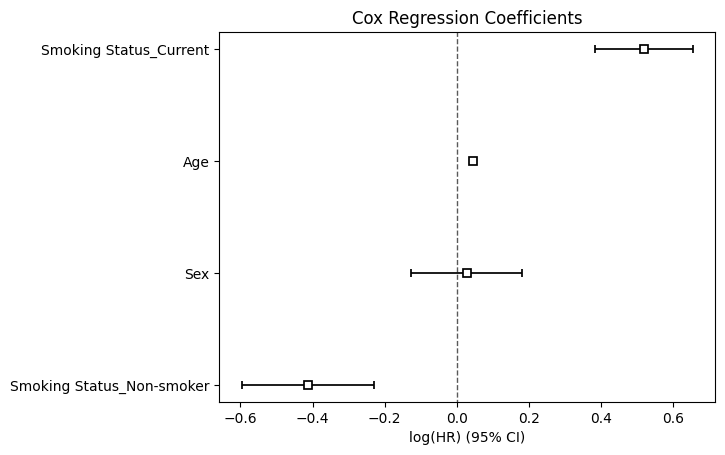

In [ ]:
# Load libraries
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import numpy as np
#import Jinja2


# Load Dataset
df = pd.read_csv("/Users/rachel/Desktop/binf5507git/BINF5507/Assignment4/Data/RADCURE_Clinical_v04_20241219 - RADCURE_TCIA_Clinical_r2_offset.csv")
#df.head()

# Clean Dataset

# Identify features where <50% of the data is missing - drop colums
missing_data = (df.isna().sum() / len(df)) * 100
print(missing_data) # Age, Sex, and Smoking Status are not missing any data
drop_cols = missing_data[missing_data >= 50].index
df_clean = df.drop(columns=drop_cols)

# Encode variables
df_clean["Status Encoded"] = df_clean["Status"].map({"Dead": 1, "Alive": 0})
df_clean["Sex"] = df_clean["Sex"].map({'Male':0, 'Female': 1})
# Remove unknown values, then encode
print((df_clean['Smoking Status'] == 'unknown').sum()) # 45 unknown values
print(df_clean['Smoking Status'].unique())
df_clean = df_clean[df_clean['Smoking Status'] != 'unknown']

#df_clean['Smoking Status'] = df_clean['Smoking Status'].map({"Non-smoker": 0,
                                                            # "Ex-smoker": 1,
                                                            # "Current": 2})


df_clean = pd.get_dummies(df_clean, columns=['Smoking Status'])
df_clean.head()

# Filter dataset to include the event, time, and selected covariates - Age, Sex, Smoking Status (non smokers and current smokers only)
df_clean = df_clean[['Status Encoded', "Length FU", "Age", "Sex", "Smoking Status_Non-smoker", "Smoking Status_Current" ]]


# Fit the Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(df_clean, duration_col='Length FU', event_col='Status Encoded')

# Print the summary of the model
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Regression Coefficients')
plt.show()